In [6]:
import torch
import sys
import pylab as plt
import numpy as np
import os
sys.path.append('../')
from Model.PatchCNN import PatchCNN


softmax = torch.nn.Softmax()
#num_layers = [3,4,6,3]  # res34
num_layers = [2,2,2,2] # res18
#dropout_rate = 0
#dilation = 2

device = torch.device('cuda:0')

model = PatchCNN(layers=num_layers,dropout_rate=dropout_rate)
state_dict = torch.load('/mnt/DATA_CRLM/Patches/Checkpoints/PatchCNN/PatchCNN_448/PatchCNN_best.pth')
new_state_dict = {}
for key in model.state_dict():
    new_state_dict[key] = state_dict['module.'+key].double()
model.load_state_dict(new_state_dict)
model.eval()
model.to(device)

PatchCNN(
  (base): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=T

In [42]:

train_path = '/mnt/DATA_CRLM/Patches/Patches_Level0/Patches_448/All/'
label_list = ['H', 'N', 'F', 'T', 'I', 'M', 'B', 'D' ,'C', 'G','Y']
label_dict = {}
label_point = [(35981,81083),(93094,105493),(3888,31980),(105494,128220),(81084,82911),(82912,93093),(0,1030),(3617,3887),(1031,3616),(37981,35980),(128221,128601)]
label_dict = dict(zip(label_list,label_point))
#index =36000

def get_feature(index=0,show=False):

    flist = os.listdir(train_path)
    flist.sort()
    tmp_train_img = flist[index]
    #print tmp_train_img

    test_img = plt.imread(train_path+tmp_train_img)

    if show:
        plt.imshow(test_img)
        plt.axis('off')
        plt.show()

    if test_img.max()>2:
        test_img = test_img/255.0
    test_tensor = torch.from_numpy(((test_img-np.array([0.485, 0.456, 0.406]))/ np.array([0.229, 0.224, 0.225])).transpose(2,0,1)).float()
    test_tensor = test_tensor.unsqueeze(0)
    feature_ref = softmax(model(test_tensor.to(device)))
    
    return feature_ref,label_list.index(tmp_train_img[0])

In [75]:
#import numpy as np
s,e = label_dict['B']
for i in range(s,e):
    x,y =get_feature(index=i,show=False)
    #print y
    a,b = torch.max(x,1)
    #print a,b
    if np.sum(np.array(b==y))!=16:
        #get_feature(index=i,show=True)
        print "index  :",i,"label :",y,"Predicted: ",b.median().cpu().item()
        #break
    

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


index  : 70 label : 6 Predicted:  5
index  : 249 label : 6 Predicted:  6
index  : 261 label : 6 Predicted:  6
index  : 268 label : 6 Predicted:  6
index  : 279 label : 6 Predicted:  6
index  : 280 label : 6 Predicted:  0
index  : 702 label : 6 Predicted:  6
index  : 715 label : 6 Predicted:  1
index  : 716 label : 6 Predicted:  6
index  : 719 label : 6 Predicted:  0
index  : 720 label : 6 Predicted:  6
index  : 721 label : 6 Predicted:  6
index  : 772 label : 6 Predicted:  0
index  : 795 label : 6 Predicted:  0
index  : 797 label : 6 Predicted:  2
index  : 798 label : 6 Predicted:  6
index  : 799 label : 6 Predicted:  6
index  : 801 label : 6 Predicted:  6
index  : 803 label : 6 Predicted:  6
index  : 825 label : 6 Predicted:  6
index  : 835 label : 6 Predicted:  3
index  : 836 label : 6 Predicted:  1
index  : 837 label : 6 Predicted:  1
index  : 838 label : 6 Predicted:  1
index  : 839 label : 6 Predicted:  1
index  : 840 label : 6 Predicted:  1
index  : 863 label : 6 Predicted:  6
in

In [65]:
s,e = label_dict['H']
for i in range(s,e):
    x,y =get_feature(index=i,show=False)
    #print y
    a,b = torch.max(x,1)
    #print a,b
    if np.sum(np.array(b==y))!=16 and np.sum(np.array(a>0.9)) ==16:
        #get_feature(index=i,show=True)
        print "index  :",i,"label :",y,"Predicted: ",b.median().cpu().item()
        #break

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


index  : 74991 label : 0 Predicted:  2
index  : 78273 label : 0 Predicted:  6
index  : 78274 label : 0 Predicted:  6
index  : 78275 label : 0 Predicted:  6


In [69]:
s,e = label_dict['F']
for i in range(s,e):
    x,y =get_feature(index=i,show=False)
    #print y
    a,b = torch.max(x,1)
    #print a,b
    if np.sum(np.array(b==y))!=16 and np.sum(np.array(a>0.9)) ==16:
        #get_feature(index=i,show=True)
        print "index  :",i,"label :",y,"Predicted: ",b.median().cpu().item()
        #break

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


index  : 3909 label : 2 Predicted:  3
index  : 3911 label : 2 Predicted:  3
index  : 3953 label : 2 Predicted:  3
index  : 4106 label : 2 Predicted:  3
index  : 4115 label : 2 Predicted:  3
index  : 4118 label : 2 Predicted:  3
index  : 4306 label : 2 Predicted:  3
index  : 4307 label : 2 Predicted:  3
index  : 4308 label : 2 Predicted:  3
index  : 4564 label : 2 Predicted:  1
index  : 6967 label : 2 Predicted:  1
index  : 9542 label : 2 Predicted:  4
index  : 10871 label : 2 Predicted:  4
index  : 10872 label : 2 Predicted:  4
index  : 10873 label : 2 Predicted:  4
index  : 11019 label : 2 Predicted:  1
index  : 11547 label : 2 Predicted:  1
index  : 14771 label : 2 Predicted:  1
index  : 14772 label : 2 Predicted:  1
index  : 16231 label : 2 Predicted:  3
index  : 16232 label : 2 Predicted:  3
index  : 17379 label : 2 Predicted:  8
index  : 29673 label : 2 Predicted:  1
index  : 29677 label : 2 Predicted:  1
index  : 29724 label : 2 Predicted:  1
index  : 29725 label : 2 Predicted:  

In [86]:
s,e = label_dict['H']
for i in range(s,s+5000):
    x,y =get_feature(index=i,show=False)
    #print y
    a,b = torch.max(x,1)
    #print a,b
    if np.sum(np.array(b==y))!=16:
        #get_feature(index=i,show=True)
        print "index  :",i,"label :",y,"Predicted: ",b.median().cpu().item()
        #break

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


index  : 36006 label : 0 Predicted:  2
index  : 36987 label : 0 Predicted:  3
index  : 38025 label : 0 Predicted:  0
index  : 38127 label : 0 Predicted:  2
index  : 38161 label : 0 Predicted:  0
index  : 38164 label : 0 Predicted:  0
index  : 38240 label : 0 Predicted:  3
index  : 38241 label : 0 Predicted:  2
index  : 38280 label : 0 Predicted:  0
index  : 38704 label : 0 Predicted:  0
index  : 39162 label : 0 Predicted:  8
index  : 39716 label : 0 Predicted:  0
index  : 40378 label : 0 Predicted:  4


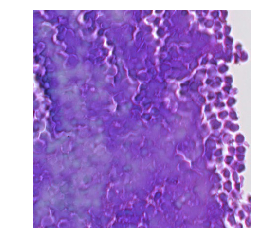

tensor([[[ 0.9816,  0.9933,  0.9765,  0.9715],
         [ 0.9892,  0.9911,  0.9794,  0.9843],
         [ 0.9894,  0.9943,  0.9736,  0.9834],
         [ 0.9711,  0.9828,  0.9726,  0.9661]]], device='cuda:0') tensor([[[ 6,  6,  6,  6],
         [ 6,  6,  6,  6],
         [ 6,  6,  6,  6],
         [ 6,  6,  6,  6]]], device='cuda:0')


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:27: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


In [87]:

x,y =get_feature(index=51,show=True)
#print y
a,b = torch.max(x,1)
print a,b

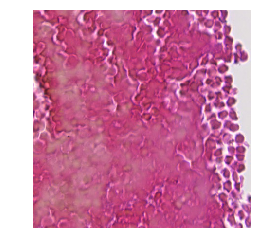

In [97]:
#import cv2
index = 51
flist = os.listdir(train_path)
flist.sort()
tmp_train_img = flist[index]
#print tmp_train_img

test_img = plt.imread(train_path+tmp_train_img)

plt.imshow(test_img[:,:,(2,1,0)])
plt.axis('off')
plt.show()